# ML Trader

In [1]:
from utils.packages import *
from utils.variables import *
from utils.i_o import *
from utils.dir_slope import *
from utils.engine import *
from utils.loops import *
from utils.order import *
import winsound
from tqdm import tqdm
tqdm.pandas()

In [2]:
data["plot"] = False

# data['input_rows'] = 100000

data['take_profit_method']  = 'simple'
data['stop_loss_method']    = 'simple'

data['start_date'] = {'year':2021, 'month':5, 'date':2}
data['end_date']   = {'year':2021, 'month':5, 'date':16}

In [3]:
%%time
data = get_date_list(data)
data = read_data(data)
data = run_engine(data)

 88%|█████████████████████████████    | 493002/559469 [02:50<02:15, 489.53it/s]

pls    0.01058
dtype: float64
--------------------------------------
                  date ord_types  llema_angle               close_type  \
0  2021-05-05 09:15:52     short         -7.0  simple_slema_move_close   
1  2021-05-06 02:47:53     short         -8.0  simple_slema_move_close   
2  2021-05-07 05:56:47      long          0.0  simple_slema_move_close   
3  2021-05-07 10:08:46      long          9.0  simple_slema_move_close   
4  2021-05-07 12:33:00      long          7.0       simple_take_profit   
5  2021-05-07 14:35:31      long          6.0       simple_take_profit   
6  2021-05-10 07:39:06      long          9.0              simple_stop   
7  2021-05-10 14:15:49     short         -0.0               sema_close   
8  2021-05-10 17:19:41      long          6.0              simple_stop   
9  2021-05-11 07:52:56     short         -7.0  simple_slema_move_close   
10 2021-05-12 10:47:49     short         -6.0  simple_slema_move_close   
11 2021-05-12 12:30:07     short         -6

100%|████████████████████████████████| 559469/559469 [02:54<00:00, 3207.01it/s]

Wall time: 6min 52s


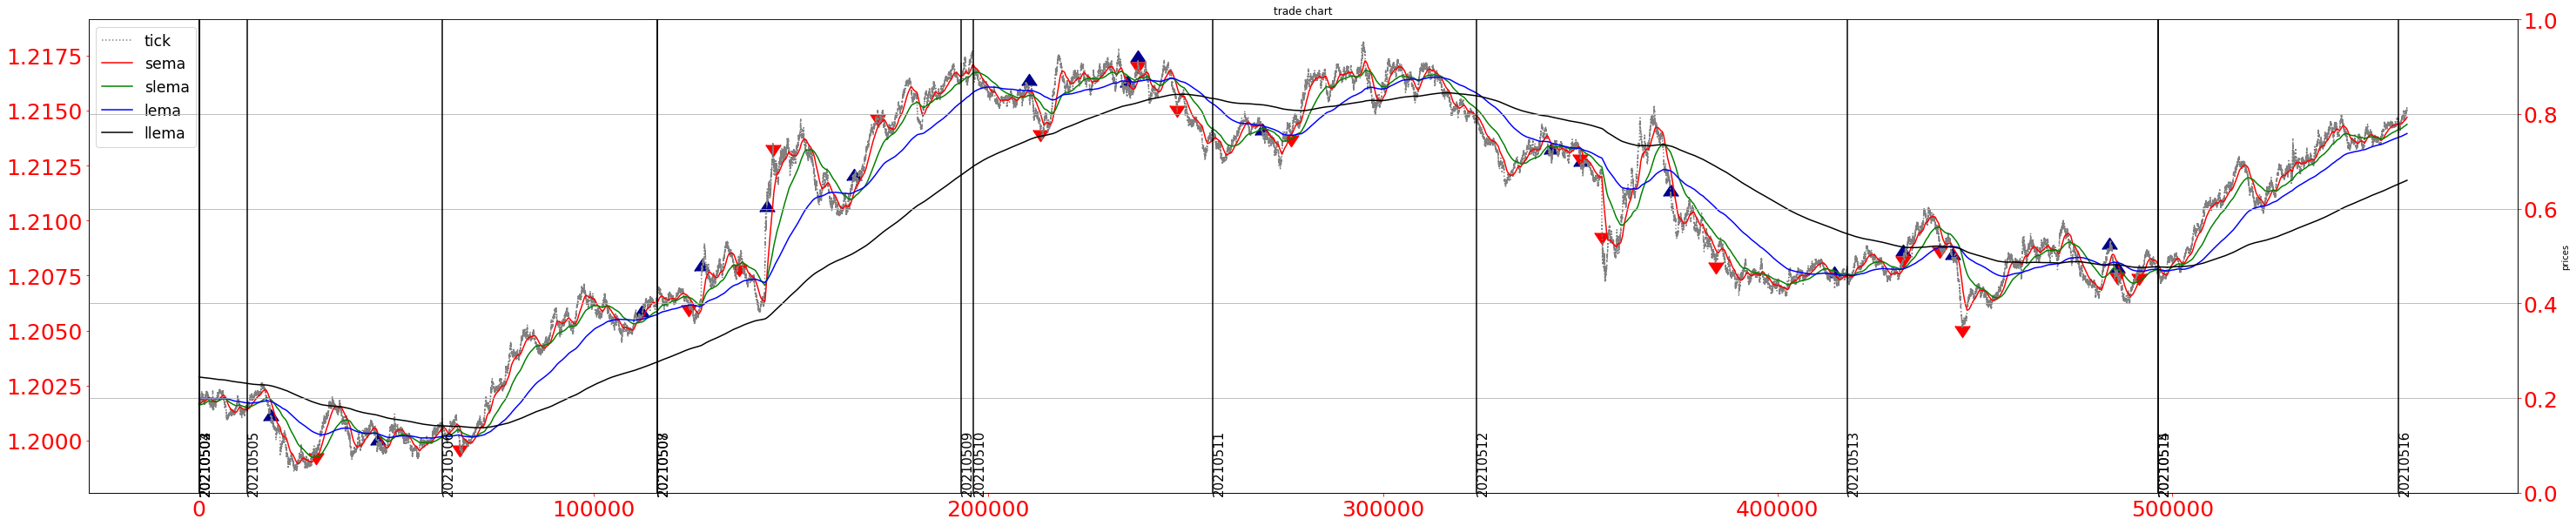

-----------------------------------------------------
date_val          : ['20210502', '20210503', '20210504', '20210505', '20210506', '20210507', '20210508', '20210509', '20210510', '20210511', '20210512', '20210513', '20210514', '20210515', '20210516']
Total PL : 0.010579999999999999
-------------
net_pl            : 0.01058/0.025
-------------
+ve               : num= 13    sum= +0.01779    avg= +0.00137
-ve               : num= 5    sum= -0.00721    avg= -0.00144
-----------------------------------------------------
date_val
5     0.00148
6     0.00001
7     0.00681
10   -0.00515
11    0.00001
12    0.00602
13    0.00140
Name: pls, dtype: float64
-----------------------------------------------------
 0.00001    4
-0.00200    2
 0.00301    2
 0.00300    2
 0.00302    1
 0.00148    1
 0.00044    1
-0.00096    1
 0.00055    1
-0.00110    1
-0.00115    1
 0.00024    1
Name: pls, dtype: int64
-----------------------------------------------------


In [4]:
if data["plot"]:
    data = adjust_plot_list_lengths(data)
    plot_graph(data)
    
print('-----------------------------------------------------')
print_report(data)
print('-----------------------------------------------------')
print(data['report_df'].groupby(['date_val'])['pls'].sum())
print('-----------------------------------------------------')
print(data['report_df']['pls'].value_counts())
print('-----------------------------------------------------')
data['report_df']

winsound.PlaySound('C:\\Windows\\Media\\tada.wav', winsound.SND_ASYNC)